In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import logging

import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from batchglm.api.models.nb_glm import Simulator
import diffxpy.api as de

In [3]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.getLogger("batchglm").setLevel(logging.INFO)
logging.getLogger("diffxpy").setLevel(logging.INFO)

# Generate some data:

In [4]:
sim = Simulator(num_observations=100, num_features=100)
sim.generate_sample_description(num_batches=0, num_conditions=0)
sim.generate()

In [5]:
random_sample_description = pd.DataFrame({
    "pseudotime": np.random.random(size=sim.num_observations),
    "batch": np.random.randint(2, size=sim.num_observations)
})

In [6]:
random_sample_description.iloc[:3,:]

,pseudotime,batch
0,0.603489,1
1,0.809889,0
2,0.971552,0


Add batch effect:

In [7]:
X = sim.X
X[random_sample_description['batch']==0,:] = X[random_sample_description['batch']==0,:]*2

# Run differential expression test

In [8]:
test = de.test.continuous_1d(
    data=X,
    continuous="pseudotime",
    df=3,
    formula_loc="~ 1 + pseudotime + batch",
    formula_scale="~ 1",
    factor_loc_totest="pseudotime",
    test="wald",
    sample_description=random_sample_description,
    quick_scale=False,
    batch_size=None,
    dtype="float64"
)

INFO:diffxpy.testing.base:Fitting model...
Fitting model...
INFO:batchglm.train.tf.nb_glm.estimator:Using standard initialization for mean
Using standard initialization for mean
INFO:batchglm.train.tf.nb_glm.estimator:Should train mu: True
Should train mu: True
INFO:batchglm.train.tf.nb_glm.estimator:Using standard initialization for dispersion
Using standard initialization for dispersion
INFO:batchglm.train.tf.nb_glm.estimator:Should train r: True
Should train r: True


/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


INFO:batchglm.train.tf.nb_glm.estimator:training strategy:
[{'convergence_criteria': 'scaled_moving_average',
  'learning_rate': 0.5,
  'loss_window_size': 20,
  'optim_algo': 'ADAM',
  'stopping_criteria': 1e-05,
  'use_batching': False},
 {'convergence_criteria': 'scaled_moving_average',
  'loss_window_size': 10,
  'optim_algo': 'newton',
  'stopping_criteria': 1e-10,
  'use_batching': False}]
training strategy:
[{'convergence_criteria': 'scaled_moving_average',
  'learning_rate': 0.5,
  'loss_window_size': 20,
  'optim_algo': 'ADAM',
  'stopping_criteria': 1e-05,
  'use_batching': False},
 {'convergence_criteria': 'scaled_moving_average',
  'loss_window_size': 10,
  'optim_algo': 'newton',
  'stopping_criteria': 1e-10,
  'use_batching': False}]
INFO:batchglm.train.tf.nb_glm.estimator:Beginning with training sequence #1
Beginning with training sequence #1
INFO:batchglm.train.tf.nb_glm.estimator:Training sequence #1 complete
Training sequence #1 complete
INFO:batchglm.train.tf.nb_glm.

# Obtain the results

In [9]:
test.summary()

,gene,pval,qval,log2fc,mean,grad,ll
0,0,0.048994,0.544378,12.557138,12928.85,1.535593e-11,-974.389052
1,1,0.525069,0.883994,10.148823,2723.89,9.522766e-12,-876.107441
2,2,0.445955,0.883994,12.461947,12607.44,3.690298e-12,-1016.873408
3,3,0.815556,0.969184,12.456404,11941.62,4.487115e-12,-1023.313319
4,4,0.496088,0.883994,12.611919,9715.42,1.499344e-12,-987.731594
5,5,0.888466,0.971782,11.170507,8522.95,4.425995e-12,-977.934395
6,6,0.709778,0.952585,10.293913,4743.12,3.202219e-12,-906.669392
7,7,0.105326,0.653084,9.433491,1685.92,3.988702e-12,-766.635109
8,8,0.810497,0.969184,11.387252,6270.87,1.132469e-12,-952.128480
9,9,0.540456,0.883994,11.536200,13894.15,9.318914e-12,-974.782440


Plot fits by gene:

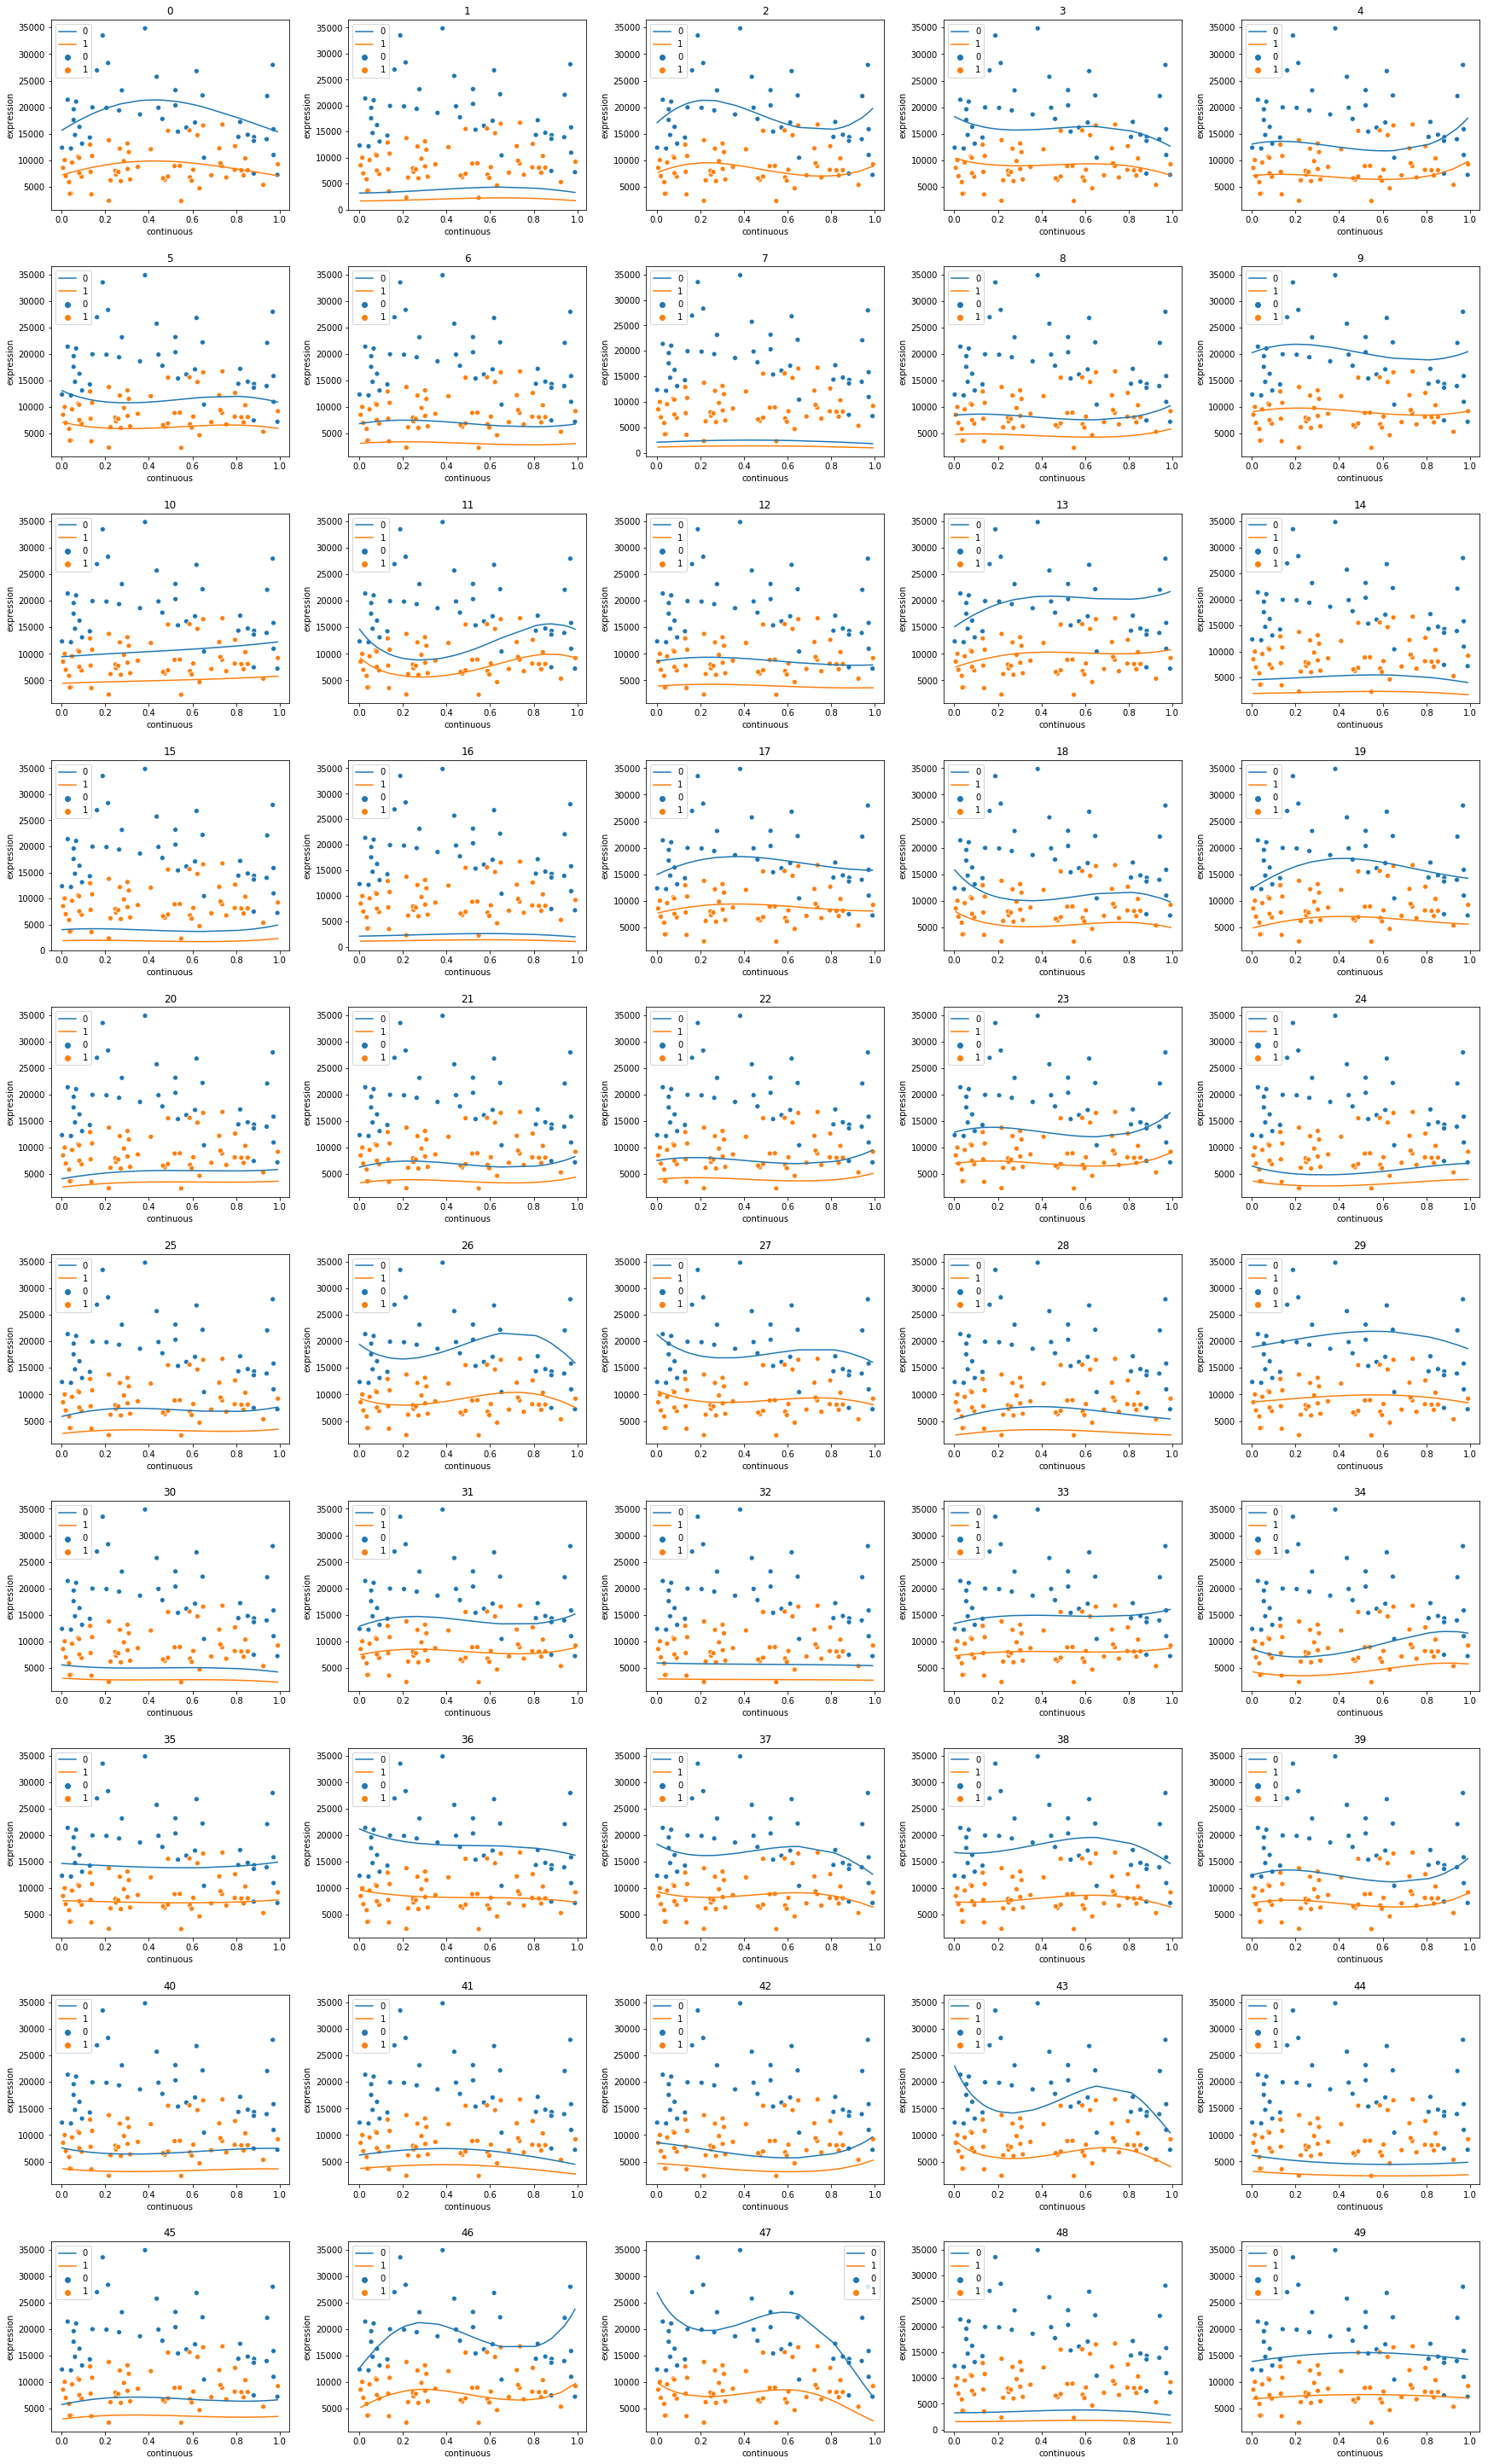

In [10]:
axs = test.plot_genes(
    genes=test.gene_ids[:50], 
    hue=random_sample_description['batch'].values,
    nonnumeric=True,
    show=True,
    ncols=5
)

Plot heatmap of all genes. This plots the models fits (essentially a smoothingk).

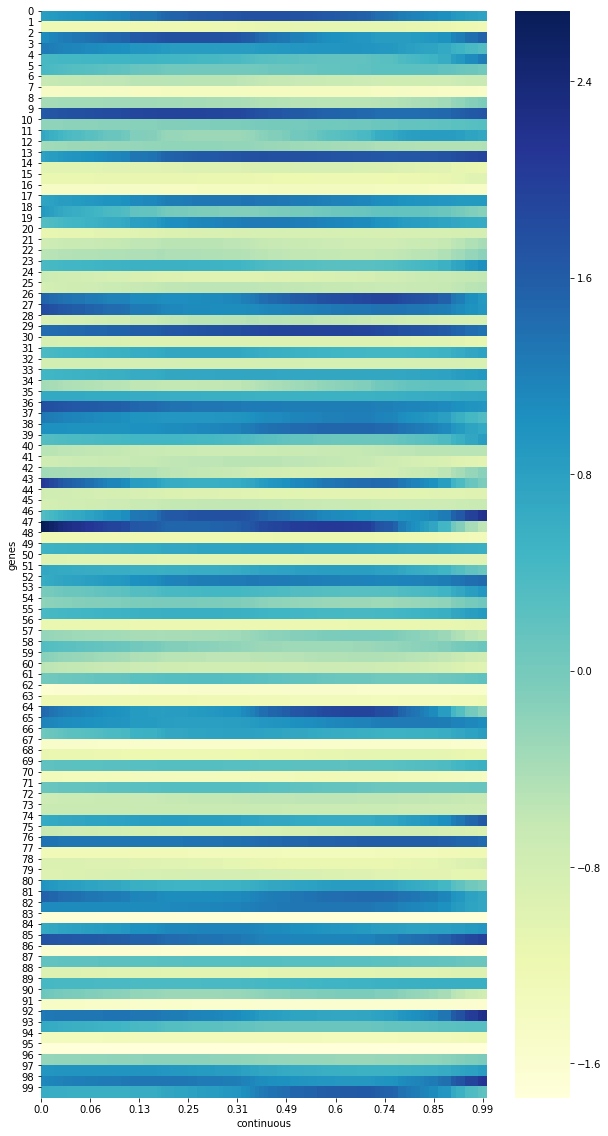

In [11]:
test.plot_heatmap(genes=test.gene_ids, transform="zscore", height_per_gene=0.2, show=True)